# Ejemplo PCA

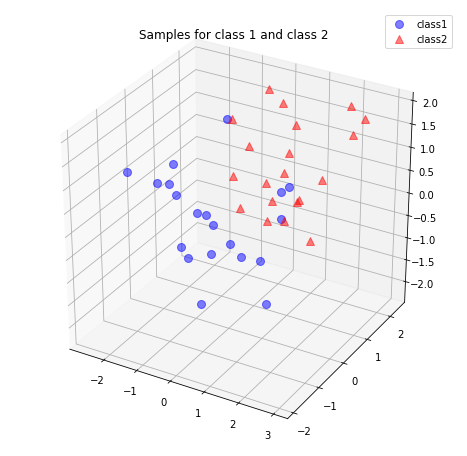

Mean Vector:
 [[0.29956475]
 [0.47617417]
 [0.38598358]]
Covariance Matrix:
 [[1.58491711 0.33021516 0.31681955]
 [0.33021516 1.04382718 0.16649617]
 [0.31681955 0.16649617 1.09494539]]
Eigenvector 1: 
[-0.82340537 -0.46428986  0.32624917]
Eigenvalue 1 from covariance matrix: 1.9001214927828234
----------------------------------------
Eigenvector 2: 
[-0.39646912  0.05938006 -0.91612567]
Eigenvalue 2 from covariance matrix: 0.939676607245477
----------------------------------------
Eigenvector 3: 
[-0.40597517  0.88369052  0.23297045]
Eigenvalue 3 from covariance matrix: 0.8838915833031844
----------------------------------------
1.9001214927828234
0.939676607245477
0.8838915833031844
Matrix W:
 [[-0.82340537 -0.46428986]
 [-0.39646912  0.05938006]
 [-0.40597517  0.88369052]]


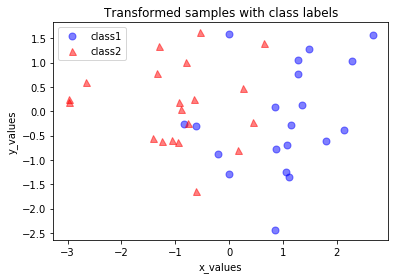

Matrix W:
 [[-0.82340537 -0.46428986  0.32624917]
 [-0.39646912  0.05938006 -0.91612567]
 [-0.40597517  0.88369052  0.23297045]]


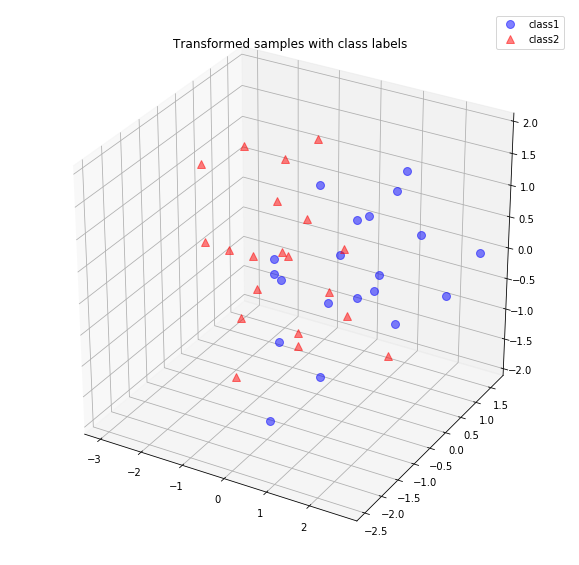

In [250]:
#Algoritmo basado en la documentación encontrada en: https://sebastianraschka.com/Articles/2014_pca_step_by_step.html
#%matplotlib inline
import numpy as np

#Cargar data sets
np.random.seed(234239784) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

#Mostrar data sets
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

#Unir datasets
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

#Media
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)
all_samples=all_samples-mean_vector

#Matriz de covarianza
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

#Eigen valores

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_cov)):
    
    print('Eigenvector {}: \n{}'.format(i+1, eig_vec_cov[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(40 * '-')
    
#Ordenar eigen
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort( reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])


# Escojer k eigenvectores con los mayores eigenvalores

matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
#Apilamos los eigenvectores¨* hubicados en la posición [#][1] de nuestros pares.
print('Matrix W:\n', matrix_w)



#Transformación a sub espacio de 2 x2 nuevo
transformed = matrix_w.T.dot(all_samples)
plt.plot(transformed[0,0:20],  transformed[1,0:20],  'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')
plt.show() 



matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1), eig_pairs[2][1].reshape(3,1)))
#Apilamos los eigenvectores¨* hubicados en la posición [#][1] de nuestros pares.
print('Matrix W:\n', matrix_w)


transformed = matrix_w.T.dot(all_samples)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

plt.rcParams['legend.fontsize'] = 10   
ax.plot(transformed[0,0:20],  transformed[1,0:20],transformed[2,0:20], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(transformed[0,20:40], transformed[1,20:40],transformed[2,20:40], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Transformed samples with class labels')
ax.legend(loc='best')


plt.show() 


In [14]:
import pandas as pd
wh = pd.read_csv("data/weight-height.csv")
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
co = wh.corr()
co

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


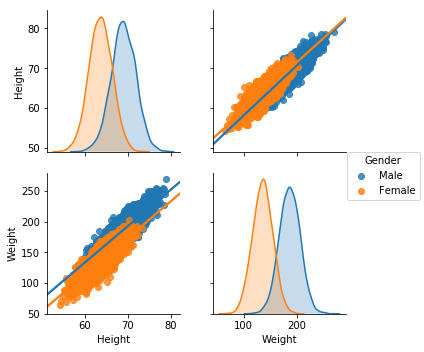

In [19]:
import seaborn as sns
sns.pairplot(data=wh,
             kind='reg',
             diag_kind="kde",
             diag_kws=dict(shade=True),
             hue="Gender")

In [212]:
wh.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [213]:
HeigH = np.array([wh[wh['Gender']=='Male'].Height])
HeigM = np.array([wh[wh['Gender']=='Female'].Height])

WeigH = np.array([wh[wh['Gender']=='Male'].Weight])
WeigM = np.array([wh[wh['Gender']=='Female'].Weight])

In [251]:
Heig = np.array([wh[wh['Gender']==c].Height for c in wh.Gender.unique()  ])
Weig = np.array([wh[wh['Gender']==c].Weight for c in wh.Gender.unique()  ])
Heig

array([[73.84701702, 68.78190405, 74.11010539, ..., 67.01379497,
        71.55771849, 70.35187988],
       [58.91073204, 65.23001251, 63.36900376, ..., 63.86799221,
        69.03424313, 61.94424588]])

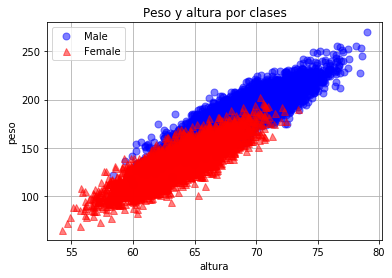

In [252]:
#Espacio 2x2

plt.plot(Heig[:][0],Weig[:][0],  'o', markersize=7, color='blue', alpha=0.5, label='Male')
plt.plot(Heig[:][1],Weig[:][1],  '^', markersize=7, color='red', alpha=0.5, label='Female')
plt.xlabel('altura')
plt.ylabel('peso')
plt.legend()
plt.title('Peso y altura por clases')
plt.grid()
plt.show() 

In [224]:
#Media
mean_x = np.mean(Heig)
mean_y = np.mean(Weig)
print("media en Altura:" , mean_x,"\nmedia en Peso:" ,mean_y)

mean_vector = np.array([[mean_x],[mean_y]])
print('Mean Vector:\n', mean_vector)

#Normalizar
Heig=Heig-mean_x
Weig=Weig-mean_y


media en Altura: 66.36755975482124 
media en Peso: 161.44035683283076
Mean Vector:
 [[ 66.36755975]
 [161.44035683]]


In [225]:
#Obtención de límites
print(Heig[0].shape)
print(Weig.shape)
#Concatenación de caacteristicas
    
all_Heig=np.concatenate((Heig[0][:],Heig[1][:]))
all_Weig=np.concatenate((Weig[0][:],Weig[1][:]))

(5000,)
(2, 5000)


In [226]:
#Matriz de covarianza
cov_mat = np.cov([all_Heig,all_Weig])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[  14.80347264  114.24265645]
 [ 114.24265645 1030.95185544]]


In [227]:
#Eigen valores

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_cov)):
    
    print('Eigenvector {}: \n{}'.format(i+1, eig_vec_cov[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(80 * '-')
    

Eigenvector 1: 
[-0.99389139 -0.1103626 ]
Eigenvalue 1 from covariance matrix: 2.1178647864264804
--------------------------------------------------------------------------------
Eigenvector 2: 
[ 0.1103626  -0.99389139]
Eigenvalue 2 from covariance matrix: 1043.637463289103
--------------------------------------------------------------------------------


In [228]:
#Ordenar eigen
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov)) ]
print(eig_pairs)
print(80*'.')

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(reverse=True) #Invertir sort

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

[(2.1178647864264804, array([-0.99389139,  0.1103626 ])), (1043.637463289103, array([-0.1103626 , -0.99389139]))]
................................................................................
1043.637463289103
2.1178647864264804


In [229]:
# Escojer k eigenvectores con los mayores eigenvalores

matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1), eig_pairs[1][1].reshape(2,1)))
#Apilamos los eigenvectores¨* hubicados en la posición [#][1] de nuestros pares.
print('Matrix W:\n', matrix_w)


Matrix W:
 [[-0.1103626  -0.99389139]
 [-0.99389139  0.1103626 ]]


In [242]:
#Transformación a sub espacio de 2 x2 nuevo
transformed = matrix_w.T.dot([all_Heig,all_Weig])
transformed
#transformed.shape

array([[-80.7872015 ,  -1.1312538 , -51.84161148, ...,  33.03952629,
         -2.69167202,  47.98748448],
       [  1.44525673,  -2.30356778,  -2.0335931 , ...,  -1.1538086 ,
         -2.38418753,  -0.87807342]])

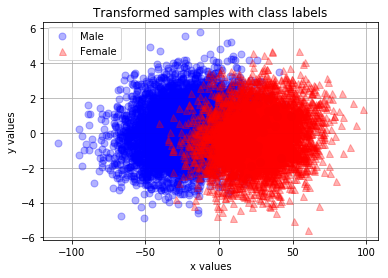

In [248]:
#Graficado de datos

plt.plot(transformed[0,0:5000],  transformed[1,0:5000],  'o', markersize=7, color='blue', alpha=0.3, label='Male')
plt.plot(transformed[0,5001:10000],  transformed[1,5001:10000], '^', markersize=7, color='red', alpha=0.3, label='Female')

plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.title('Transformed samples with class labels')
plt.grid()
plt.show() 


